## International US Foreign Currency Exchange Rates Predictor

#### Author: Andrew Tran

## Blog Post Inspiration and Objectives

In this blog post, I was hoping to look into using Machine Learning to make a prediction system. In particular, I was hoping to imitate ones used for stock prediction. However, since there were too many tutorials on this topic, I decided to investigate into another global, financial factor that governs trade internationally: international currency rates. In the news recently, I have heard rumors of how the international standard of utilizing the US dollar could be compromised with other global powers such as China and India rise in global dominance. Thus, I focused my efforts on analyzing the US currency conversion rates to other countries. With that said, let's try to analyze this topic with some Machine Learning:

## Data Preprocessing - Cleaning and Analytics

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from copy import deepcopy
import datetime as dt
plt.style.use("fivethirtyeight")

First, we will read and display the initial dataset in our file system for this blog post, downloaded from Kaggle. This dataset contains loads of valuable information such as almost every major world power's international US currency conversion rate.

In [2]:
# Reading and displaying the initial dataset
df = pd.read_csv("datasets/foreign_exchange_rates.csv")
df

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


For clarity on the constraints and parameters of the working datasets, I went to find high-level exploratory statistics on all of the datasets: shape, information about all of the entries, etc.

In [3]:
# Determining the shape of the initial dataset
df.shape

(5217, 24)

In [4]:
# Getting a sample of the initial dataset through the seeing the first 10 entries
# completely in the dataset
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [5]:
# Figuring out all of the columns (and their names) available for me to use in the dataset
df.columns

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [6]:
# Figuring out the number of duplicated elements in the dataset
# (could be problematic if not resolved)
df.duplicated().sum()

0

In [7]:
# Figuring out the number of 'null'/'NaN' elements in the dataset 
# (if NaN filling is needed or not)
(df.isnull().sum() / df.shape[0]) * 100

Unnamed: 0                                   0.0
Time Serie                                   0.0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0.0
EURO AREA - EURO/US$                         0.0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0.0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0.0
BRAZIL - REAL/US$                            0.0
CANADA - CANADIAN DOLLAR/US$                 0.0
CHINA - YUAN/US$                             0.0
HONG KONG - HONG KONG DOLLAR/US$             0.0
INDIA - INDIAN RUPEE/US$                     0.0
KOREA - WON/US$                              0.0
MEXICO - MEXICAN PESO/US$                    0.0
SOUTH AFRICA - RAND/US$                      0.0
SINGAPORE - SINGAPORE DOLLAR/US$             0.0
DENMARK - DANISH KRONE/US$                   0.0
JAPAN - YEN/US$                              0.0
MALAYSIA - RINGGIT/US$                       0.0
NORWAY - NORWEGIAN KRONE/US$                 0.0
SWEDEN - KRONA/US$                           0.0
SRI LANKA - SRI LANK

In [8]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

Additionally, before handing my combined Book dataset over for Machine Learning training and prediction, I need to clean the data prior to the analysis stage: removing duplicates, deleting null/NaN vales, fixing types of columns, filling invalid values with suitable alternatives, etc.

In [9]:
# Removing unnecessary/unnamed columns in the dataset
df = df.drop("Unnamed: 0", axis=1)
df

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,71.28,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,71.3,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [10]:
# Converting the date column into a string representation to a parsable
# Datetime object (needed for later)
df = df.rename(columns={"Time Serie": "DATE"})

def str_to_datetime(date_str: str):
    split = tuple(date_str.split("-"))
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return dt.datetime(year, month, day)

df["DATE"] = df["DATE"].apply(str_to_datetime)
df["DATE"]

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5212   2019-12-25
5213   2019-12-26
5214   2019-12-27
5215   2019-12-30
5216   2019-12-31
Name: DATE, Length: 5217, dtype: datetime64[ns]

As shown below, I had decided to filter out all of the countries except Austrailia, Canada, the United Kingdom, and Switzerland because those countries had the most stable and consistent international currency rates as well as the most comparable (1:1) currency rates with the United States. One additional reason that these countries were selected for this blog post was do the geographical diversity covered most landmass continents across the world, representative of the global market interactions that the United States deals with on a day-to-day basis.

In [11]:
# Making the "Date" column the new index (better identifer/key in dataset)
# Taking out other countries except Austrailia, Canada, UK, and 
# Switzerland from dataset for Machine Learning blog post
df.index = df.pop("DATE")
df = df[["AUSTRALIA - AUSTRALIAN DOLLAR/US$", 
         "CANADA - CANADIAN DOLLAR/US$",
         "UNITED KINGDOM - UNITED KINGDOM POUND/US$",
         "SWITZERLAND - FRANC/US$"]]
df

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,CANADA - CANADIAN DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SWITZERLAND - FRANC/US$
DATE,,,,
2000-01-03,1.5172,1.4465,0.6146,1.5808
2000-01-04,1.5239,1.4518,0.6109,1.5565
2000-01-05,1.5267,1.4518,0.6092,1.5526
2000-01-06,1.5291,1.4571,0.607,1.554
2000-01-07,1.5272,1.4505,0.6104,1.5623
...,...,...,...,...
2019-12-25,ND,ND,ND,ND
2019-12-26,1.4411,1.3124,0.7688,0.9808
2019-12-27,1.4331,1.3073,0.7639,0.9741


In [12]:
# Converting of all numerical international currency rates to 2-decimal 
# rates (easier to work with for later)
for col in df:
    df[col] = df[col].map(lambda entry: entry if entry == "ND" else round(float(entry), 2))
df

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,CANADA - CANADIAN DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SWITZERLAND - FRANC/US$
DATE,,,,
2000-01-03,1.52,1.45,0.61,1.58
2000-01-04,1.52,1.45,0.61,1.56
2000-01-05,1.53,1.45,0.61,1.55
2000-01-06,1.53,1.46,0.61,1.55
2000-01-07,1.53,1.45,0.61,1.56
...,...,...,...,...
2019-12-25,ND,ND,ND,ND
2019-12-26,1.44,1.31,0.77,0.98
2019-12-27,1.43,1.31,0.76,0.97


In [13]:
# Removing all of the dated rows that contains "ND" as a way to avoid
# problems when trying to interlay Machine Learning algorithms that require only
# quantitative data with categorical entries
nd_index_list: set[str] = set()
for row_index, _ in df.iterrows():
    for col_entry in df.loc[row_index]:
        if col_entry == "ND":
             nd_index_list.add(row_index)

df = df.drop(labels=list(nd_index_list), axis=0)
df

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,CANADA - CANADIAN DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SWITZERLAND - FRANC/US$
DATE,,,,
2000-01-03,1.52,1.45,0.61,1.58
2000-01-04,1.52,1.45,0.61,1.56
2000-01-05,1.53,1.45,0.61,1.55
2000-01-06,1.53,1.46,0.61,1.55
2000-01-07,1.53,1.45,0.61,1.56
...,...,...,...,...
2019-12-24,1.44,1.32,0.77,0.98
2019-12-26,1.44,1.31,0.77,0.98
2019-12-27,1.43,1.31,0.76,0.97


As shown in the code snippet below, with some online references, the `df_to_windowed_df` function describes a way to use prediction values. A new international currency rate dataframe is created which includes the rows encompassing the 3 previous dates prior to the current date of when the international currency rate was reported as well as the current rate that day. This would be helpful for later Machine Learning predictions because the previous 3 dates and the current will provide it enough context to make more insightful predictions on the future of the international currency rates between that respective country specified and the United States. Later, as you will see, the 3 previous days are going to be the input and the current currency rate (`Target`) will be our output.

In [14]:
def df_to_windowed_df(data_frame: pd.DataFrame, first_date_str: str, last_date_str: str, n: int, col_name: str):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates: list = []
    X: list = []
    Y: list = []
    
    last_time = False
    while True:
        df_subset = data_frame.loc[:target_date].tail(n + 1)
        
        if (len(df_subset) != n + 1):
            print("Error: Window of size " + str(n) + " is too large for date " + str(target_date))
            return
        
        values = df_subset[col_name].to_numpy()
        x, y = values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = data_frame.loc[target_date:target_date + dt.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split("T")[0]
        year_month_day = next_date_str.split("-")
        year, month, day = year_month_day
        next_date = dt.datetime(year=int(year), month=int(month), day=int(day))
        
        if last_time:
            break
        
        target_date = next_date
        if (target_date == last_date):
            last_time = True
    
    returned_df = pd.DataFrame({})
    returned_df["Target Date"] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        returned_df["Target-" + str(n - i)] = X[:, i]
    returned_df["Target"] = Y
    
    return returned_df 

Thus, with the `df_to_windowed_df` function created, we created one for every country to later use for Machine Learning model training and eventual predictions of future rates: Austrailia, Canada, the United Kingdom, and Switzerland.

In [15]:
# Convert Austrailia's dataframe to a windowed dataframe
windowed_df_austrailia = df_to_windowed_df(data_frame=df, 
                                first_date_str="2000-01-06",
                                last_date_str="2019-12-31",
                                n=3,
                                col_name="AUSTRALIA - AUSTRALIAN DOLLAR/US$")
windowed_df_austrailia  

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-01-06,1.52,1.52,1.53,1.53
1,2000-01-07,1.52,1.53,1.53,1.53
2,2000-01-10,1.53,1.53,1.53,1.52
3,2000-01-11,1.53,1.53,1.52,1.52
4,2000-01-12,1.53,1.52,1.52,1.52
...,...,...,...,...,...
5011,2019-12-24,1.45,1.45,1.45,1.44
5012,2019-12-26,1.45,1.45,1.44,1.44
5013,2019-12-27,1.45,1.44,1.44,1.43
5014,2019-12-30,1.44,1.44,1.43,1.43


In [16]:
# Convert Canada's dataframe to a windowed dataframe
windowed_df_canada = df_to_windowed_df(data_frame=df, 
                                first_date_str="2000-01-06",
                                last_date_str="2019-12-31",
                                n=3,
                                col_name="CANADA - CANADIAN DOLLAR/US$")
windowed_df_canada

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-01-06,1.45,1.45,1.45,1.46
1,2000-01-07,1.45,1.45,1.46,1.45
2,2000-01-10,1.45,1.46,1.45,1.46
3,2000-01-11,1.46,1.45,1.46,1.46
4,2000-01-12,1.45,1.46,1.46,1.46
...,...,...,...,...,...
5011,2019-12-24,1.31,1.32,1.32,1.32
5012,2019-12-26,1.32,1.32,1.32,1.31
5013,2019-12-27,1.32,1.32,1.31,1.31
5014,2019-12-30,1.32,1.31,1.31,1.31


In [17]:
# Convert United Kingdom's dataframe to a windowed dataframe
windowed_df_united_kingdom = df_to_windowed_df(data_frame=df, 
                                first_date_str="2000-01-06",
                                last_date_str="2019-12-31",
                                n=3,
                                col_name="UNITED KINGDOM - UNITED KINGDOM POUND/US$")
windowed_df_united_kingdom

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-01-06,0.61,0.61,0.61,0.61
1,2000-01-07,0.61,0.61,0.61,0.61
2,2000-01-10,0.61,0.61,0.61,0.61
3,2000-01-11,0.61,0.61,0.61,0.61
4,2000-01-12,0.61,0.61,0.61,0.61
...,...,...,...,...,...
5011,2019-12-24,0.77,0.77,0.77,0.77
5012,2019-12-26,0.77,0.77,0.77,0.77
5013,2019-12-27,0.77,0.77,0.77,0.76
5014,2019-12-30,0.77,0.77,0.76,0.76


In [18]:
# Convert Switzerland's dataframe to a windowed dataframe
windowed_df_switzerland = df_to_windowed_df(data_frame=df, 
                                first_date_str="2000-01-06",
                                last_date_str="2019-12-31",
                                n=3,
                                col_name="SWITZERLAND - FRANC/US$")
windowed_df_switzerland

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-01-06,1.58,1.56,1.55,1.55
1,2000-01-07,1.56,1.55,1.55,1.56
2,2000-01-10,1.55,1.55,1.56,1.57
3,2000-01-11,1.55,1.56,1.57,1.56
4,2000-01-12,1.56,1.57,1.56,1.57
...,...,...,...,...,...
5011,2019-12-24,0.98,0.98,0.98,0.98
5012,2019-12-26,0.98,0.98,0.98,0.98
5013,2019-12-27,0.98,0.98,0.98,0.97
5014,2019-12-30,0.98,0.98,0.97,0.97


As the Machine Learning model that will be used later in this blog post only accepts `numpy` arrays, we need to extract each of the following quantities from each respective country's dataframe: the dates as an `np.array`, the X-values for input as an 3-dimensional `np.array`, and the Y-values for output as an `np.array`. Thus, with some online references, our codebase now has a function called `windowed_df_to_date_X_y` as shown below to account for this needed transformation.

In [19]:
def windowed_df_to_date_X_y(windowed_dataframe: pd.DataFrame):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates_austrailia, X_austrailia, y_austrailia = windowed_df_to_date_X_y(windowed_dataframe=windowed_df_austrailia)
dates_canada, X_canada, y_canada = windowed_df_to_date_X_y(windowed_dataframe=windowed_df_canada)
dates_united_kingdom, X_united_kingdom, y_united_kingdom = windowed_df_to_date_X_y(windowed_dataframe=windowed_df_united_kingdom)
dates_switzerland, X_switzerland, y_switzerland = windowed_df_to_date_X_y(windowed_dataframe=windowed_df_switzerland)

print(dates_austrailia.shape, X_austrailia.shape, y_austrailia.shape)
print(dates_canada.shape, X_canada.shape, y_canada.shape)
print(dates_united_kingdom.shape, X_united_kingdom.shape, y_united_kingdom.shape)
print(dates_switzerland.shape, X_switzerland.shape, y_switzerland.shape)
len(windowed_df_austrailia), len(windowed_df_canada), len(windowed_df_united_kingdom), len(windowed_df_switzerland)

(5016,) (5016, 3, 1) (5016,)
(5016,) (5016, 3, 1) (5016,)
(5016,) (5016, 3, 1) (5016,)
(5016,) (5016, 3, 1) (5016,)


(5016, 5016, 5016, 5016)

Here, I am trying to a visualization of the cleaned dataset before we pass it over for Machine Learning training and prediction. To show the rate of change for the International Currency Rates for Austrailia, Canada, the United Kingdom, and Switzerland over the 20-year period as collected in the data set, I put together a line graph as shown below.

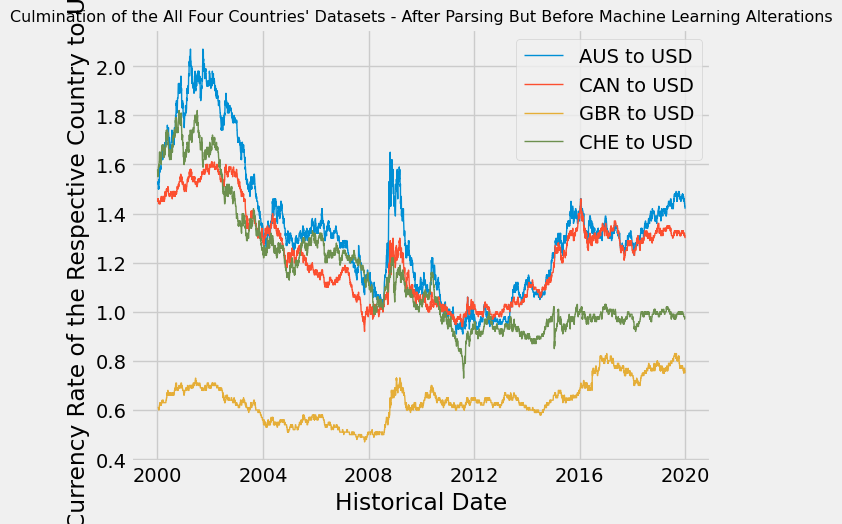

In [20]:
# Plotting the each four countries currency rates (per US dollar) from 
# 2000 - 2020
plt.plot(df.index, df["AUSTRALIA - AUSTRALIAN DOLLAR/US$"], label="AUS to USD", linewidth=1)
plt.plot(df.index, df[ "CANADA - CANADIAN DOLLAR/US$"], label="CAN to USD", linewidth=1)
plt.plot(df.index, df["UNITED KINGDOM - UNITED KINGDOM POUND/US$"], label="GBR to USD", linewidth=1)
plt.plot(df.index, df["SWITZERLAND - FRANC/US$"], label="CHE to USD", linewidth=1)

plt.legend(loc="upper right")
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the All Four Countries' Datasets - After Parsing But Before Machine Learning Alterations")
plt.show()

## Machine Learning - Model Training and Evaluation

Great, now we are onto the Machine Learning part of the blog post!

For this blog post, I worked to create Machine Learning models for each country's dataset separately. I started with Austrailia's data first (as shown below):

In [21]:
# Getting the location of the 80th and 90th percentile of the number of 
# points in the dataset for later train, vailidation, and test category
# splitting
percentile_80 = int(len(windowed_df_austrailia) * 0.8)
percentile_90 = int(len(windowed_df_austrailia) * 0.9)
percentile_80, percentile_90

(4012, 4514)

Since the data (date, X, and y) is split into three `np.arrays` and to be more efficient, I will manually split Austrailia's data into train, test, and validation datasets for the Machine Learning model with 80% going to the training dataset, the next 10% going to the validation dataset, and the last 10% going to the test dataset for each `np.array` respectively.

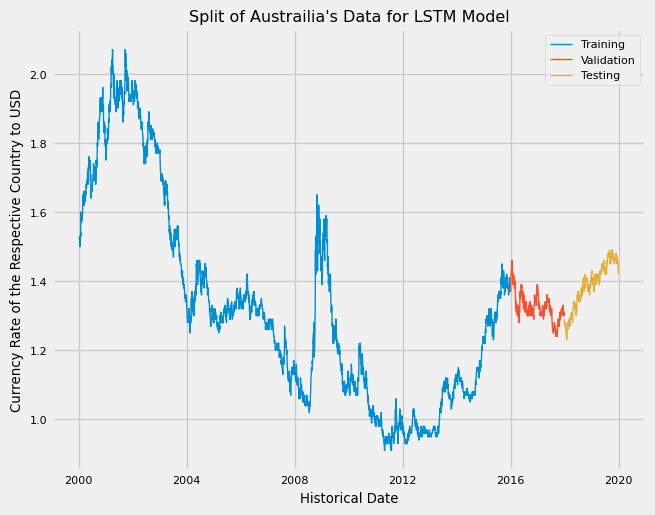

In [22]:
# Splitting Austrailia's data into train, test, and validation sets
# on 3 mediums: the X-axis, the y-axis, and the indices (represented
# by dates)
dates_austrailia_train, X_austrailia_train, y_austrailia_train = dates_austrailia[:percentile_80], X_austrailia[:percentile_80], y_austrailia[:percentile_80]
dates_austrailia_val, X_austrailia_val, y_austrailia_val = dates_austrailia[percentile_80:percentile_90], X_austrailia[percentile_80:percentile_90], y_austrailia[percentile_80:percentile_90]
dates_austrailia_test, X_austrailia_test, y_austrailia_test = dates_austrailia[percentile_90:], X_austrailia[percentile_90:], y_austrailia[percentile_90:]

plt.plot(dates_austrailia_train, y_austrailia_train, linewidth=1)
plt.plot(dates_austrailia_val, y_austrailia_val, linewidth=1)
plt.plot(dates_austrailia_test, y_austrailia_test, linewidth=1)

plt.legend(["Training", "Validation", "Testing"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Split of Austrailia's Data for LSTM Model")
plt.show()

Now, I began to configure the Machine Learning model. We added Sequential layers: an Input layer 3 by 1 because we will have 3 `np.arrays` of Input and 1 `np.array` as output, utilize a LSTM (Long Short-Term Memory) layer of 64 neurons, apply 2 levels of dense layers with 32 neurons and folliowing recommendations online to use the RELU (Rectified Linear Unit) Activiation Function, and I followed up with one last dense layer of 1 neuron as our output layer since we are just trying to linearly-predict the next currency-rate on a near-future date. Once I configured the Sequential layers, we are ready to compile the model, utilzing the `mean_square_error` as our minimizing loss function, using the `Adam` optimizer, and comparing our trained model against our data with the `mean_absolute_error` metric. Lastly, I fitted our model, utilzing our X_train and Y_train datasets for fitting with validation from our X_valid and Y_valid datasets at 100 epochs.

In [23]:
# Configuring the Machine Learning Tensorflow Model for Austrailia
austrailia_model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])

austrailia_model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])

austrailia_model.fit(X_austrailia_train, y_austrailia_train, validation_data=(X_austrailia_val, y_austrailia_val), epochs=100)

Epoch 1/100
126/126 [==============================] - 4s 9ms/step - loss: 0.1870 - mean_absolute_error: 0.2382 - val_loss: 2.6951e-04 - val_mean_absolute_error: 0.0139
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0306 - val_loss: 1.2239e-04 - val_mean_absolute_error: 0.0086
Epoch 3/100
126/126 [==============================] - 0s 4ms/step - loss: 3.5647e-04 - mean_absolute_error: 0.0145 - val_loss: 1.3040e-04 - val_mean_absolute_error: 0.0088
Epoch 4/100
126/126 [==============================] - 0s 4ms/step - loss: 2.5794e-04 - mean_absolute_error: 0.0117 - val_loss: 1.2603e-04 - val_mean_absolute_error: 0.0087
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 2.5597e-04 - mean_absolute_error: 0.0115 - val_loss: 1.2280e-04 - val_mean_absolute_error: 0.0087
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 2.5594e-04 - mean_absolute_error: 0.0116 - val_loss: 1.2635e-04 - va

After the training and fitting of the Machine Learning model for Austrailia, I tried to create visualizations comparing the model against the country's training dataset, validation dataset, but most importantly the testing dataset (as shown below in the line graphs). Note that the darker and thicker blue lines represent the prediction model's projections and the thinner red lines is the observed/gathered data.

126/126 [==============================] - 1s 1ms/step


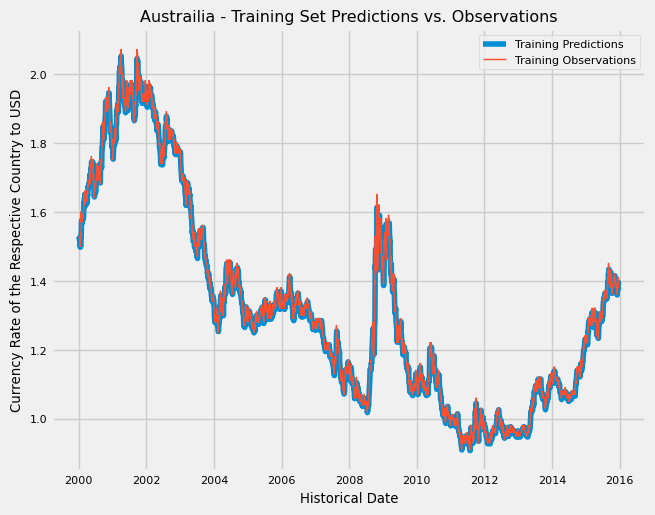

16/16 [==============================] - 0s 2ms/step


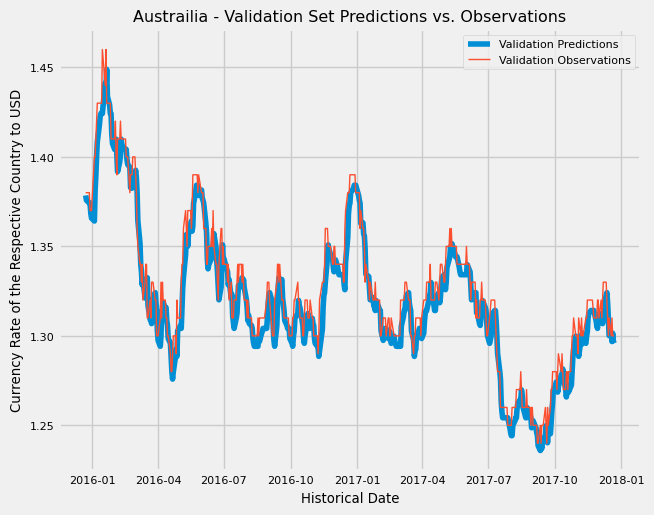

16/16 [==============================] - 0s 2ms/step


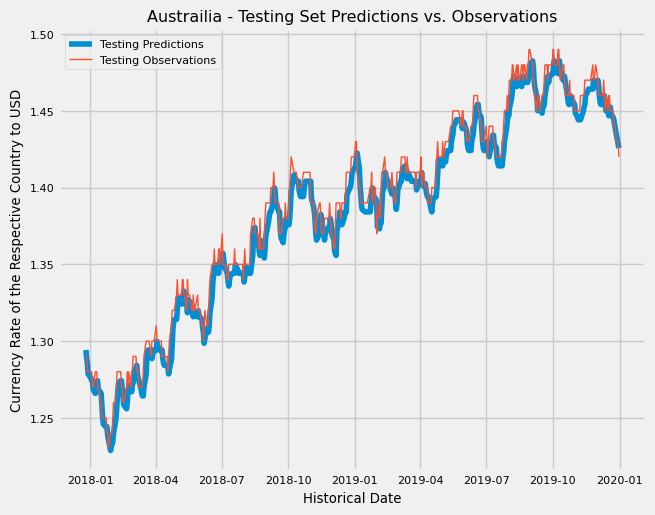

In [24]:
# Testing the Machine Learning Model prediction for Austrailia with the train, 
# validation, and test sets
# Most important is the test set prediction as this tests the effectiveness
# of the Machine Learning model on data it has not seen before 
austrailia_train_pred = austrailia_model.predict(X_austrailia_train).flatten()

plt.plot(dates_austrailia_train, austrailia_train_pred, linewidth=4)
plt.plot(dates_austrailia_train, y_austrailia_train, linewidth=1)
plt.legend(["Training Predictions", "Training Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Austrailia - Training Set Predictions vs. Observations")
plt.show()

austrailia_val_pred = austrailia_model.predict(X_austrailia_val).flatten()

plt.plot(dates_austrailia_val, austrailia_val_pred, linewidth=4)
plt.plot(dates_austrailia_val, y_austrailia_val, linewidth=1)
plt.legend(["Validation Predictions", "Validation Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Austrailia - Validation Set Predictions vs. Observations")
plt.show()

austrailia_test_pred = austrailia_model.predict(X_austrailia_test).flatten()

plt.plot(dates_austrailia_test, austrailia_test_pred, linewidth=4)
plt.plot(dates_austrailia_test, y_austrailia_test, linewidth=1)
plt.legend(["Testing Predictions", "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Austrailia - Testing Set Predictions vs. Observations")
plt.show()

Through careful consideration of all of the prediction-based vs. observation-based contrast visualizations together, I consolidated all of graphics into one singular visualization for you to see below to get a more general perspective of the effectiveness of the Machine Learning model at training and fitting towards predicting Austrailia's international currency rate with the United States.

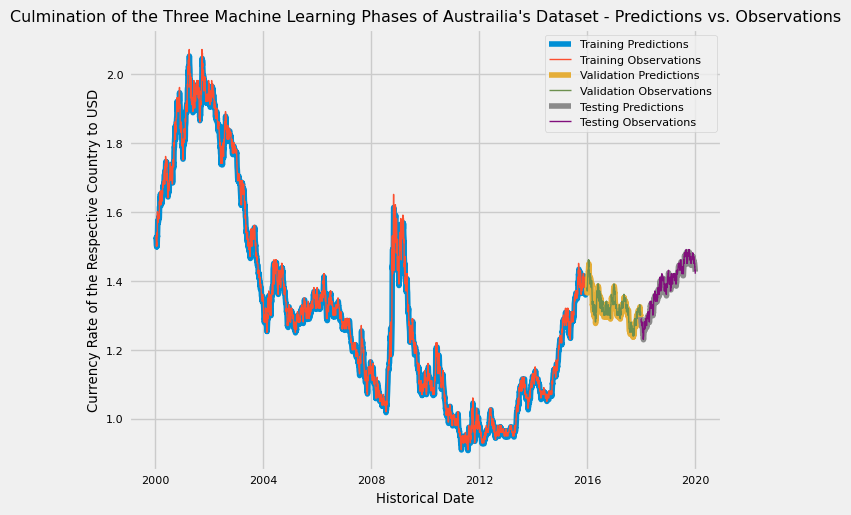

In [25]:
# Plotting Austrailia's observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model) 
plt.plot(dates_austrailia_train, austrailia_train_pred, linewidth=4)
plt.plot(dates_austrailia_train, y_austrailia_train, linewidth=1)
plt.plot(dates_austrailia_val, austrailia_val_pred, linewidth=4)
plt.plot(dates_austrailia_val, y_austrailia_val, linewidth=1)
plt.plot(dates_austrailia_test, austrailia_test_pred, linewidth=4)
plt.plot(dates_austrailia_test, y_austrailia_test, linewidth=1)

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of Austrailia's Dataset - Predictions vs. Observations")
plt.show()

Once Austraila's data was completely trained and visualized, I worked on Canada's data (as shown below):

Since the data (date, X, and y) is split into three `np.arrays` and to be more efficient, I will manually split Canada's data into train, test, and validation datasets for the Machine Learning model with 80% going to the training dataset, the next 10% going to the validation dataset, and the last 10% going to the test dataset for each `np.array` respectively.

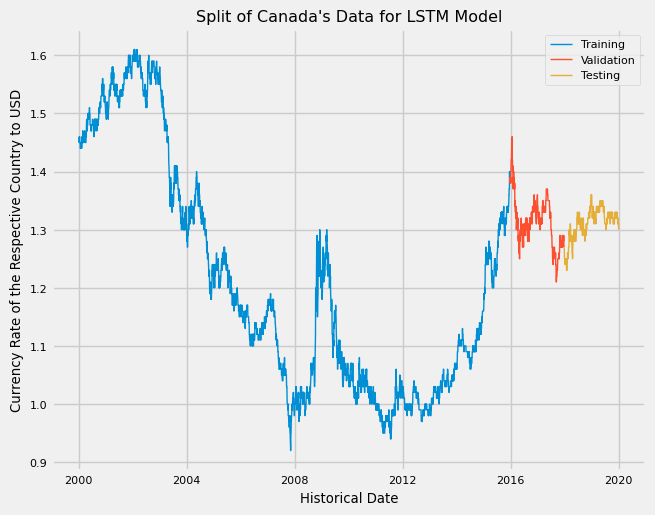

In [26]:
# Splitting Canada's data into train, test, and validation sets
# on 3 mediums: the X-axis, the y-axis, and the indices (represented
# by dates)
dates_canada_train, X_canada_train, y_canada_train = dates_canada[:percentile_80], X_canada[:percentile_80], y_canada[:percentile_80]
dates_canada_val, X_canada_val, y_canada_val = dates_canada[percentile_80:percentile_90], X_canada[percentile_80:percentile_90], y_canada[percentile_80:percentile_90]
dates_canada_test, X_canada_test, y_canada_test = dates_canada[percentile_90:], X_canada[percentile_90:], y_canada[percentile_90:]

plt.plot(dates_canada_train, y_canada_train, linewidth=1)
plt.plot(dates_canada_val, y_canada_val, linewidth=1)
plt.plot(dates_canada_test, y_canada_test, linewidth=1)

plt.legend(["Training", "Validation", "Testing"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Split of Canada's Data for LSTM Model")
plt.show()

Now, I began to configure the Machine Learning model. We added Sequential layers: an Input layer 3 by 1 because we will have 3 `np.arrays` of Input and 1 `np.array` as output, utilize a LSTM (Long Short-Term Memory) layer of 64 neurons, apply 2 levels of dense layers with 32 neurons and folliowing recommendations online to use the RELU (Rectified Linear Unit) Activiation Function, and I followed up with one last dense layer of 1 neuron as our output layer since we are just trying to linearly-predict the next currency-rate on a near-future date. Once I configured the Sequential layers, we are ready to compile the model, utilzing the `mean_square_error` as our minimizing loss function, using the `Adam` optimizer, and comparing our trained model against our data with the `mean_absolute_error` metric. Lastly, I fitted our model, utilzing our X_train and Y_train datasets for fitting with validation from our X_valid and Y_valid datasets at 100 epochs.

In [27]:
# Configuring the Machine Learning Tensorflow Model for Canada
canada_model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])

canada_model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])

canada_model.fit(X_canada_train, y_canada_train, validation_data=(X_canada_val, y_canada_val), epochs=100)

Epoch 1/100
126/126 [==============================] - 4s 7ms/step - loss: 0.1815 - mean_absolute_error: 0.2404 - val_loss: 5.2196e-04 - val_mean_absolute_error: 0.0194
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0328 - val_loss: 3.4443e-04 - val_mean_absolute_error: 0.0156
Epoch 3/100
126/126 [==============================] - 0s 3ms/step - loss: 6.0440e-04 - mean_absolute_error: 0.0210 - val_loss: 1.6581e-04 - val_mean_absolute_error: 0.0103
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 2.2336e-04 - mean_absolute_error: 0.0123 - val_loss: 1.6088e-04 - val_mean_absolute_error: 0.0103
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 1.1546e-04 - mean_absolute_error: 0.0084 - val_loss: 1.2256e-04 - val_mean_absolute_error: 0.0088
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 9.6157e-05 - mean_absolute_error: 0.0075 - val_loss: 1.0827e-04 - va

After the training and fitting of the Machine Learning model for Canada, I tried to create visualizations comparing the model against the country's training dataset, validation dataset, but most importantly the testing dataset (as shown below in the line graphs). Note that the darker and thicker blue lines represent the prediction model's projections and the thinner red lines is the observed/gathered data.

126/126 [==============================] - 1s 2ms/step


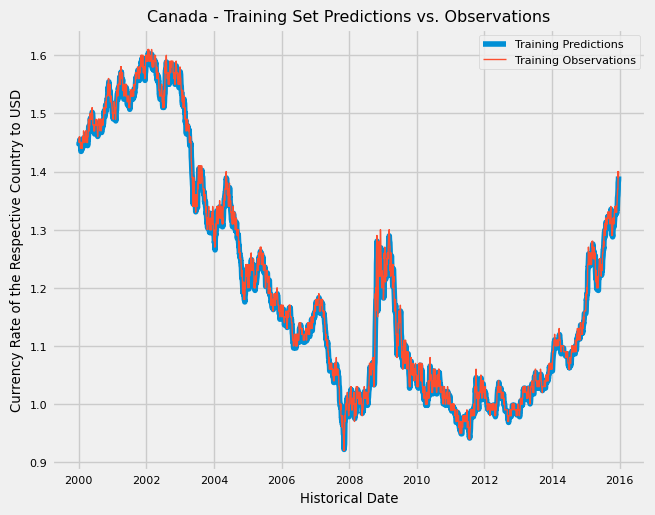

16/16 [==============================] - 0s 2ms/step


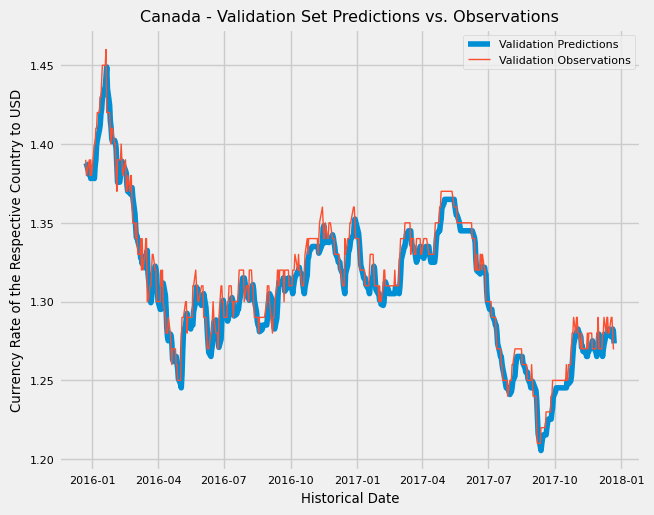

16/16 [==============================] - 0s 2ms/step


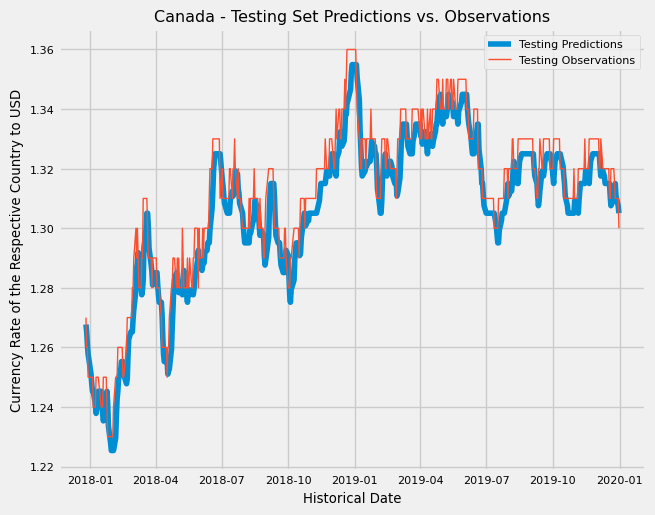

In [28]:
# Testing the Machine Learning Model prediction for Austrailia with the train, 
# validation, and test sets
# Most important is the test set prediction as this tests the effectiveness
# of the Machine Learning model on data it has not seen before 
canada_train_pred = canada_model.predict(X_canada_train).flatten()

plt.plot(dates_canada_train, canada_train_pred, linewidth=4)
plt.plot(dates_canada_train, y_canada_train, linewidth=1)
plt.legend(["Training Predictions", "Training Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Canada - Training Set Predictions vs. Observations")
plt.show()

canada_val_pred = canada_model.predict(X_canada_val).flatten()

plt.plot(dates_canada_val, canada_val_pred, linewidth=4)
plt.plot(dates_canada_val, y_canada_val, linewidth=1)
plt.legend(["Validation Predictions", "Validation Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Canada - Validation Set Predictions vs. Observations")
plt.show()

canada_test_pred = canada_model.predict(X_canada_test).flatten()

plt.plot(dates_canada_test, canada_test_pred, linewidth=4)
plt.plot(dates_canada_test, y_canada_test, linewidth=1)
plt.legend(["Testing Predictions", "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Canada - Testing Set Predictions vs. Observations")
plt.show()

Through careful consideration of all of the prediction-based vs. observation-based contrast visualizations together, I consolidated all of graphics into one singular visualization for you to see below to get a more general perspective of the effectiveness of the Machine Learning model at training and fitting towards predicting Canada's international currency rate with the United States.

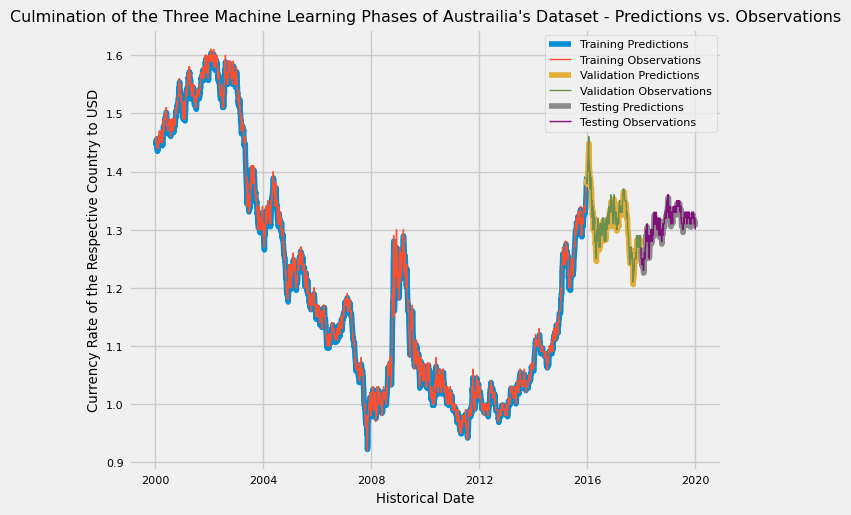

In [29]:
# Plotting Canada's observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model) 
plt.plot(dates_canada_train, canada_train_pred, linewidth=4)
plt.plot(dates_canada_train, y_canada_train, linewidth=1)
plt.plot(dates_canada_val, canada_val_pred, linewidth=4)
plt.plot(dates_canada_val, y_canada_val, linewidth=1)
plt.plot(dates_canada_test, canada_test_pred, linewidth=4)
plt.plot(dates_canada_test, y_canada_test, linewidth=1)

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations"], loc="upper right")
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of Austrailia's Dataset - Predictions vs. Observations")
plt.show()

Then, I worked on the United Kingdom's data (as shown below):

Since the data (date, X, and y) is split into three `np.arrays` and to be more efficient, I will manually split the United Kingdom's data into train, test, and validation datasets for the Machine Learning model with 80% going to the training dataset, the next 10% going to the validation dataset, and the last 10% going to the test dataset for each `np.array` respectively.

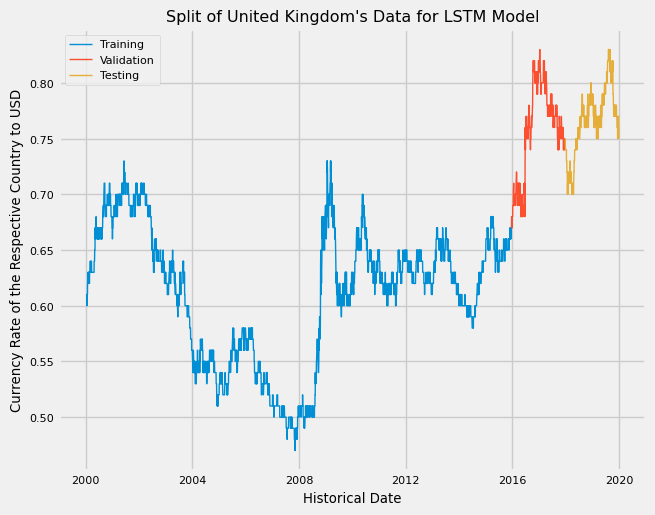

In [30]:
# Splitting United Kingdom's data into train, test, and validation sets
# on 3 mediums: the X-axis, the y-axis, and the indices (represented
# by dates)
dates_united_kingdom_train, X_united_kingdom_train, y_united_kingdom_train = dates_united_kingdom[:percentile_80], X_united_kingdom[:percentile_80], y_united_kingdom[:percentile_80]
dates_united_kingdom_val, X_united_kingdom_val, y_united_kingdom_val = dates_united_kingdom[percentile_80:percentile_90], X_united_kingdom[percentile_80:percentile_90], y_united_kingdom[percentile_80:percentile_90]
dates_united_kingdom_test, X_united_kingdom_test, y_united_kingdom_test = dates_united_kingdom[percentile_90:], X_united_kingdom[percentile_90:], y_united_kingdom[percentile_90:]

plt.plot(dates_united_kingdom_train, y_united_kingdom_train, linewidth=1)
plt.plot(dates_united_kingdom_val, y_united_kingdom_val, linewidth=1)
plt.plot(dates_united_kingdom_test, y_united_kingdom_test, linewidth=1)

plt.legend(["Training", "Validation", "Testing"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Split of United Kingdom's Data for LSTM Model")
plt.show()

Now, I began to configure the Machine Learning model. We added Sequential layers: an Input layer 3 by 1 because we will have 3 `np.arrays` of Input and 1 `np.array` as output, utilize a LSTM (Long Short-Term Memory) layer of 64 neurons, apply 2 levels of dense layers with 32 neurons and folliowing recommendations online to use the RELU (Rectified Linear Unit) Activiation Function, and I followed up with one last dense layer of 1 neuron as our output layer since we are just trying to linearly-predict the next currency-rate on a near-future date. Once I configured the Sequential layers, we are ready to compile the model, utilzing the `mean_square_error` as our minimizing loss function, using the `Adam` optimizer, and comparing our trained model against our data with the `mean_absolute_error` metric. Lastly, I fitted our model, utilzing our X_train and Y_train datasets for fitting with validation from our X_valid and Y_valid datasets at 100 epochs.

In [31]:
# Configuring the Machine Learning Tensorflow Model for United Kingdom
united_kingdom_model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])

united_kingdom_model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])

united_kingdom_model.fit(X_united_kingdom_train, y_united_kingdom_train, validation_data=(X_united_kingdom_val, y_united_kingdom_val), epochs=100)

Epoch 1/100
126/126 [==============================] - 3s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.1448 - val_loss: 0.0038 - val_mean_absolute_error: 0.0590
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 6.0424e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0033 - val_mean_absolute_error: 0.0547
Epoch 3/100
126/126 [==============================] - 0s 4ms/step - loss: 4.6536e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0024 - val_mean_absolute_error: 0.0465
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 3.0668e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0012 - val_mean_absolute_error: 0.0320
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 1.7170e-04 - mean_absolute_error: 0.0105 - val_loss: 5.0562e-04 - val_mean_absolute_error: 0.0206
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 8.4080e-05 - mean_absolute_error: 0.0072 - val_loss: 1.4667e-04 - val_mean_absol

After the training and fitting of the Machine Learning model for the United Kingdom, I tried to create visualizations comparing the model against the country's training dataset, validation dataset, but most importantly the testing dataset (as shown below in the line graphs). Note that the darker and thicker blue lines represent the prediction model's projections and the thinner red lines is the observed/gathered data.

126/126 [==============================] - 1s 2ms/step


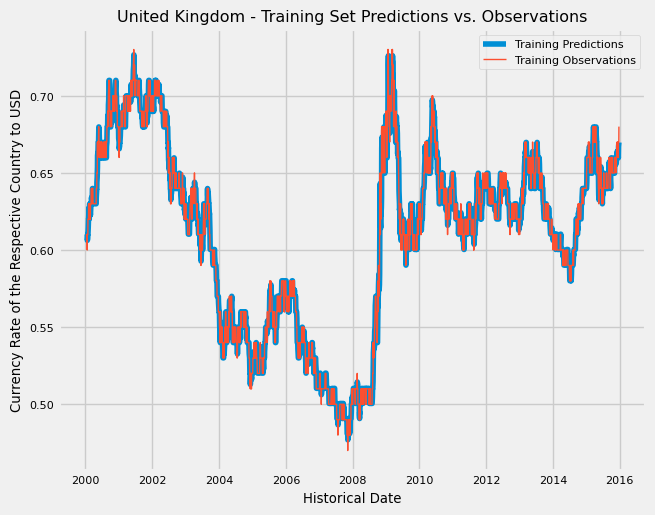

16/16 [==============================] - 0s 2ms/step


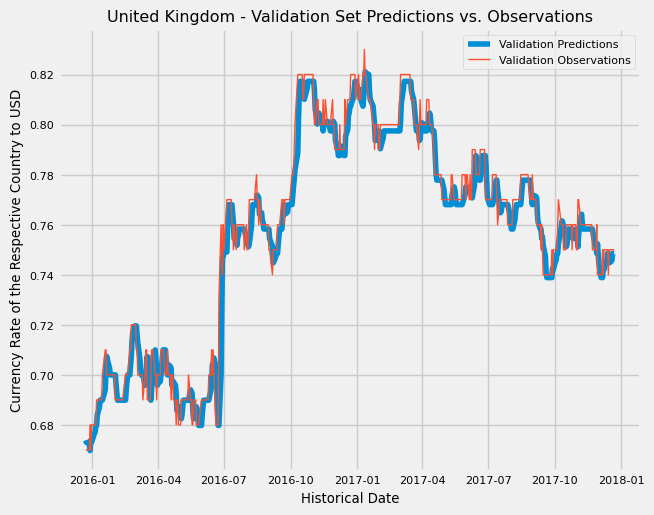

16/16 [==============================] - 0s 2ms/step


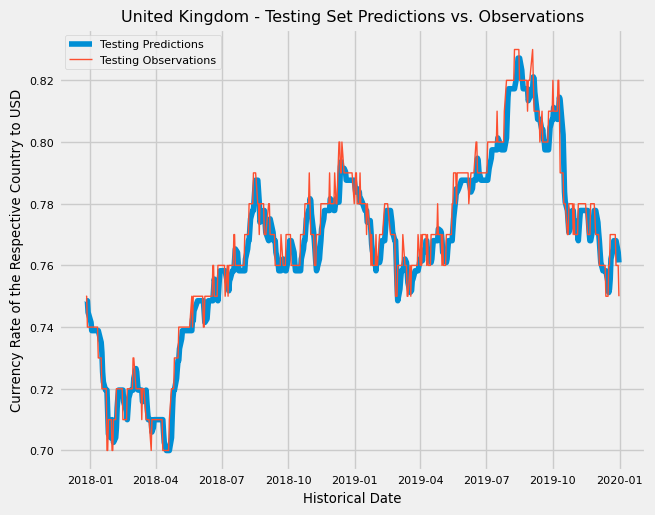

In [32]:
# Testing the Machine Learning Model prediction for United Kingdom with the train, 
# validation, and test sets
# Most important is the test set prediction as this tests the effectiveness
# of the Machine Learning model on data it has not seen before 
united_kingdom_train_pred = united_kingdom_model.predict(X_united_kingdom_train).flatten()

plt.plot(dates_united_kingdom_train, united_kingdom_train_pred, linewidth=4)
plt.plot(dates_united_kingdom_train, y_united_kingdom_train, linewidth=1)
plt.legend(["Training Predictions", "Training Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("United Kingdom - Training Set Predictions vs. Observations")
plt.show()

united_kingdom_val_pred = united_kingdom_model.predict(X_united_kingdom_val).flatten()

plt.plot(dates_united_kingdom_val, united_kingdom_val_pred, linewidth=4)
plt.plot(dates_united_kingdom_val, y_united_kingdom_val, linewidth=1)
plt.legend(["Validation Predictions", "Validation Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("United Kingdom - Validation Set Predictions vs. Observations")
plt.show()

united_kingdom_test_pred = united_kingdom_model.predict(X_united_kingdom_test).flatten()

plt.plot(dates_united_kingdom_test, united_kingdom_test_pred, linewidth=4)
plt.plot(dates_united_kingdom_test, y_united_kingdom_test, linewidth=1)
plt.legend(["Testing Predictions", "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("United Kingdom - Testing Set Predictions vs. Observations")
plt.show()

Through careful consideration of all of the prediction-based vs. observation-based contrast visualizations together, I consolidated all of graphics into one singular visualization for you to see below to get a more general perspective of the effectiveness of the Machine Learning model at training and fitting towards predicting the United Kingdom's international currency rate with the United States.

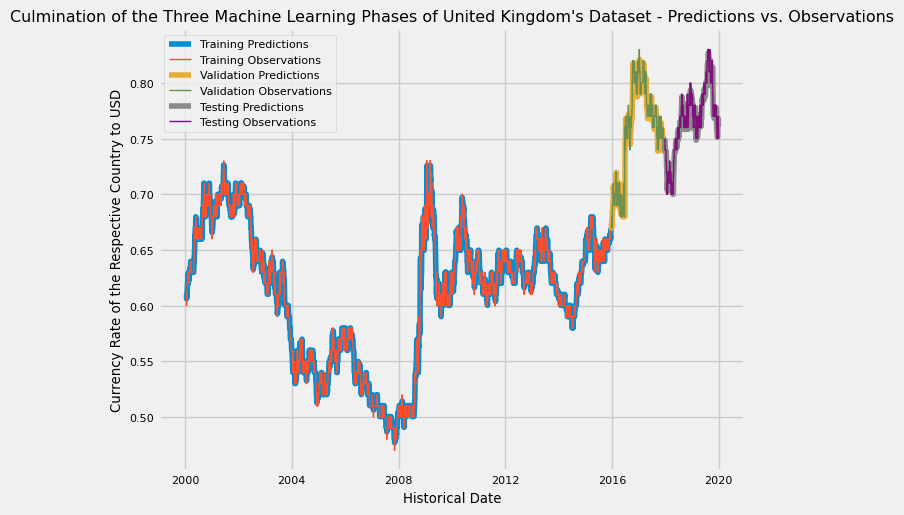

In [33]:
# Plotting United Kingdom's observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model) 
plt.plot(dates_united_kingdom_train, united_kingdom_train_pred, linewidth=4)
plt.plot(dates_united_kingdom_train, y_united_kingdom_train, linewidth=1)
plt.plot(dates_united_kingdom_val, united_kingdom_val_pred, linewidth=4)
plt.plot(dates_united_kingdom_val, y_united_kingdom_val, linewidth=1)
plt.plot(dates_united_kingdom_test, united_kingdom_test_pred, linewidth=4)
plt.plot(dates_united_kingdom_test, y_united_kingdom_test, linewidth=1)

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of United Kingdom's Dataset - Predictions vs. Observations")
plt.show()

Lastly, I worked on Switzerland's data (as shown below):

Since the data (date, X, and y) is split into three `np.arrays` and to be more efficient, I will manually split Switzerland's data into train, test, and validation datasets for the Machine Learning model with 80% going to the training dataset, the next 10% going to the validation dataset, and the last 10% going to the test dataset for each `np.array` respectively.

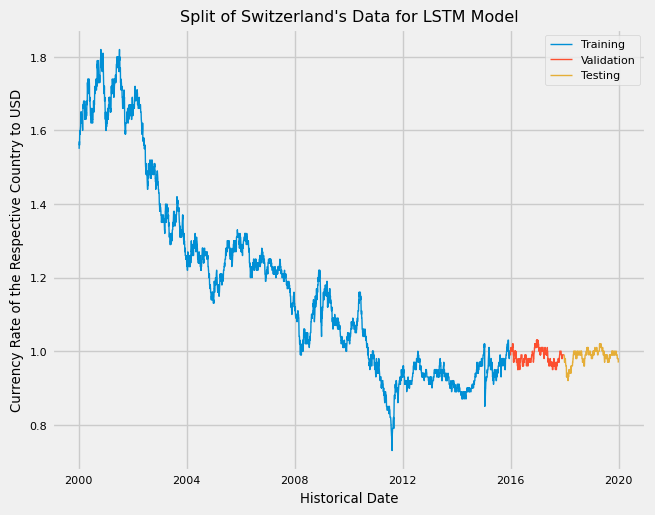

In [34]:
# Splitting Switzerland's data into train, test, and validation sets
# on 3 mediums: the X-axis, the y-axis, and the indices (represented
# by dates)
dates_switzerland_train, X_switzerland_train, y_switzerland_train = dates_switzerland[:percentile_80], X_switzerland[:percentile_80], y_switzerland[:percentile_80]
dates_switzerland_val, X_switzerland_val, y_switzerland_val = dates_switzerland[percentile_80:percentile_90], X_switzerland[percentile_80:percentile_90], y_switzerland[percentile_80:percentile_90]
dates_switzerland_test, X_switzerland_test, y_switzerland_test = dates_switzerland[percentile_90:], X_switzerland[percentile_90:], y_switzerland[percentile_90:]

plt.plot(dates_switzerland_train, y_switzerland_train, linewidth=1)
plt.plot(dates_switzerland_val, y_switzerland_val, linewidth=1)
plt.plot(dates_switzerland_test, y_switzerland_test, linewidth=1)

plt.legend(["Training", "Validation", "Testing"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Split of Switzerland's Data for LSTM Model")
plt.show()

Now, I began to configure the Machine Learning model. We added Sequential layers: an Input layer 3 by 1 because we will have 3 `np.arrays` of Input and 1 `np.array` as output, utilize a LSTM (Long Short-Term Memory) layer of 64 neurons, apply 2 levels of dense layers with 32 neurons and folliowing recommendations online to use the RELU (Rectified Linear Unit) Activiation Function, and I followed up with one last dense layer of 1 neuron as our output layer since we are just trying to linearly-predict the next currency-rate on a near-future date. Once I configured the Sequential layers, we are ready to compile the model, utilzing the `mean_square_error` as our minimizing loss function, using the `Adam` optimizer, and comparing our trained model against our data with the `mean_absolute_error` metric. Lastly, I fitted our model, utilzing our X_train and Y_train datasets for fitting with validation from our X_valid and Y_valid datasets at 100 epochs.

In [35]:
# Configuring the Machine Learning Tensorflow Model for Switzerland
switzerland_model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])

switzerland_model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])

switzerland_model.fit(X_switzerland_train, y_switzerland_train, validation_data=(X_switzerland_val, y_switzerland_val), epochs=100)

Epoch 1/100
126/126 [==============================] - 3s 8ms/step - loss: 0.1949 - mean_absolute_error: 0.2575 - val_loss: 0.0023 - val_mean_absolute_error: 0.0468
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.0019 - mean_absolute_error: 0.0352 - val_loss: 5.8865e-04 - val_mean_absolute_error: 0.0232
Epoch 3/100
126/126 [==============================] - 0s 3ms/step - loss: 3.4365e-04 - mean_absolute_error: 0.0145 - val_loss: 1.1547e-04 - val_mean_absolute_error: 0.0089
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 1.5583e-04 - mean_absolute_error: 0.0095 - val_loss: 5.0293e-05 - val_mean_absolute_error: 0.0055
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 1.4999e-04 - mean_absolute_error: 0.0092 - val_loss: 5.4530e-05 - val_mean_absolute_error: 0.0059
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 1.4880e-04 - mean_absolute_error: 0.0091 - val_loss: 5.5258e-05 - val_me

After the training and fitting of the Machine Learning model for Switzerland, I tried to create visualizations comparing the model against the country's training dataset, validation dataset, but most importantly the testing dataset (as shown below in the line graphs). Note that the darker and thicker blue lines represent the prediction model's projections and the thinner red lines is the observed/gathered data.

126/126 [==============================] - 1s 1ms/step


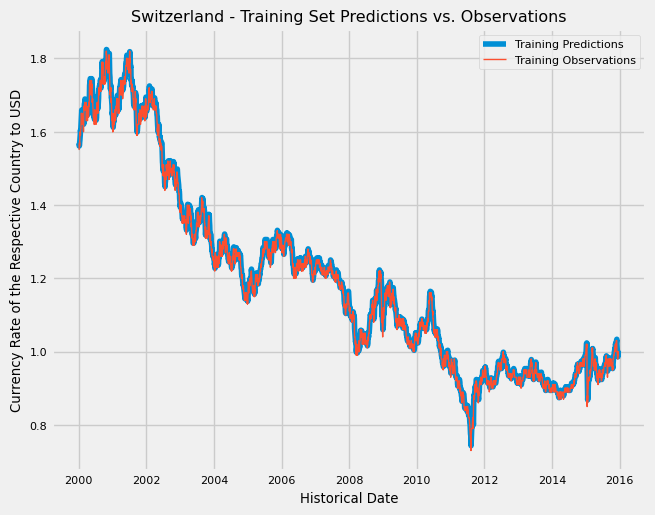

16/16 [==============================] - 0s 2ms/step


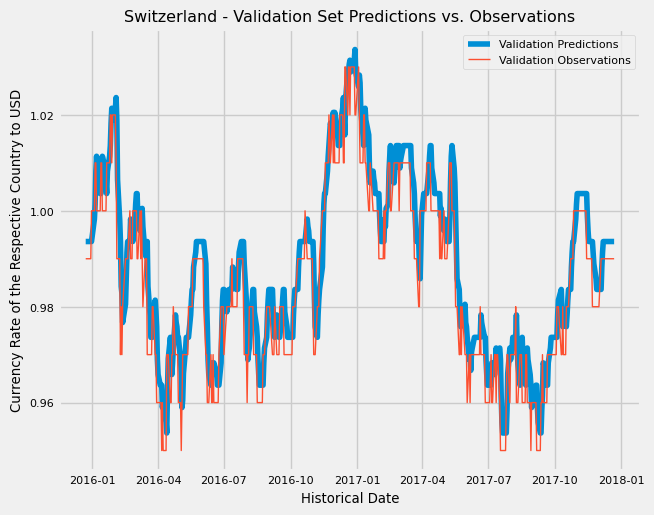

16/16 [==============================] - 0s 2ms/step


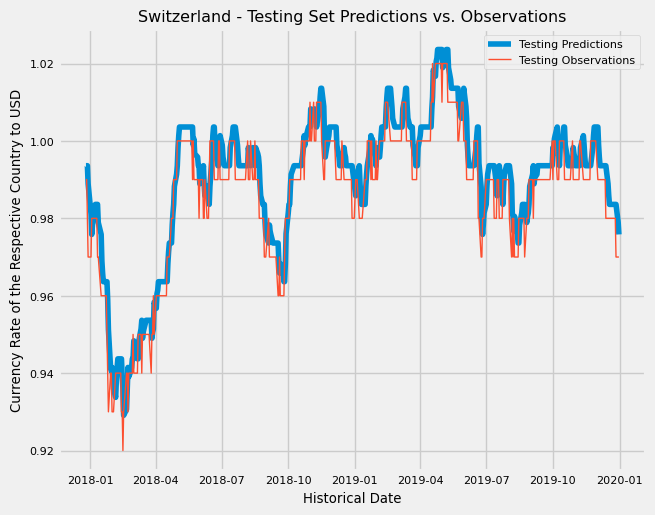

In [36]:
# Testing the Machine Learning Model prediction for Switzerland with the train, 
# validation, and test sets
# Most important is the test set prediction as this tests the effectiveness
# of the Machine Learning model on data it has not seen before 
switzerland_train_pred = switzerland_model.predict(X_switzerland_train).flatten()

plt.plot(dates_switzerland_train, switzerland_train_pred, linewidth=4)
plt.plot(dates_switzerland_train, y_switzerland_train, linewidth=1)
plt.legend(["Training Predictions", "Training Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Switzerland - Training Set Predictions vs. Observations")
plt.show()

switzerland_val_pred = switzerland_model.predict(X_switzerland_val).flatten()

plt.plot(dates_switzerland_val, switzerland_val_pred, linewidth=4)
plt.plot(dates_switzerland_val, y_switzerland_val, linewidth=1)
plt.legend(["Validation Predictions", "Validation Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Switzerland - Validation Set Predictions vs. Observations")
plt.show()

switzerland_test_pred = switzerland_model.predict(X_switzerland_test).flatten()

plt.plot(dates_switzerland_test, switzerland_test_pred, linewidth=4)
plt.plot(dates_switzerland_test, y_switzerland_test, linewidth=1)
plt.legend(["Testing Predictions", "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Switzerland - Testing Set Predictions vs. Observations")
plt.show()

Through careful consideration of all of the prediction-based vs. observation-based contrast visualizations together, I consolidated all of graphics into one singular visualization for you to see below to get a more general perspective of the effectiveness of the Machine Learning model at training and fitting towards predicting Switzerland's international currency rate with the United States.

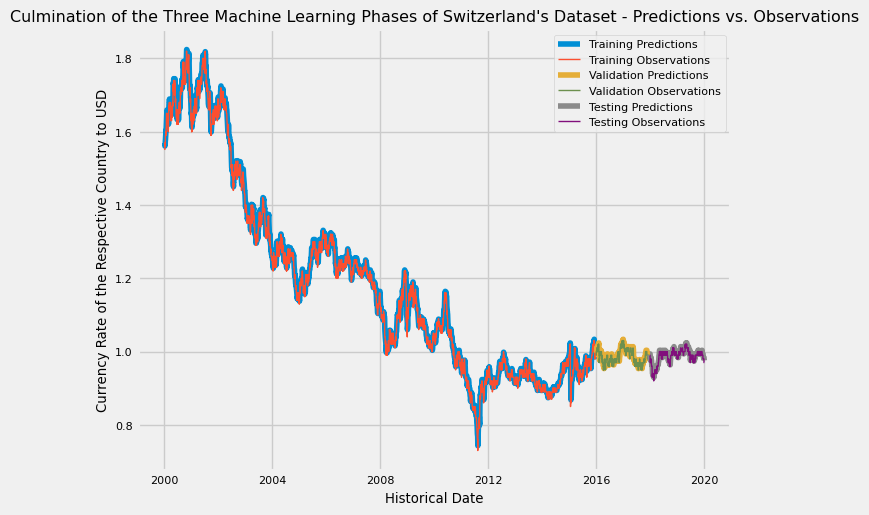

In [37]:
# Plotting Switzerland's observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model) 
plt.plot(dates_switzerland_train, switzerland_train_pred, linewidth=4)
plt.plot(dates_switzerland_train, y_switzerland_train, linewidth=1)
plt.plot(dates_switzerland_val, switzerland_val_pred, linewidth=4)
plt.plot(dates_switzerland_val, y_switzerland_val, linewidth=1)
plt.plot(dates_switzerland_test, switzerland_test_pred, linewidth=4)
plt.plot(dates_switzerland_test, y_switzerland_test, linewidth=1)

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of Switzerland's Dataset - Predictions vs. Observations")
plt.show()

To put it all together, I made one large visualization to encompass all 4 countries' Machine Learning model prediction-based vs. observation-based visualizations - Austrailia, Canada, the United Kingdom, and Switzerland as shown below.

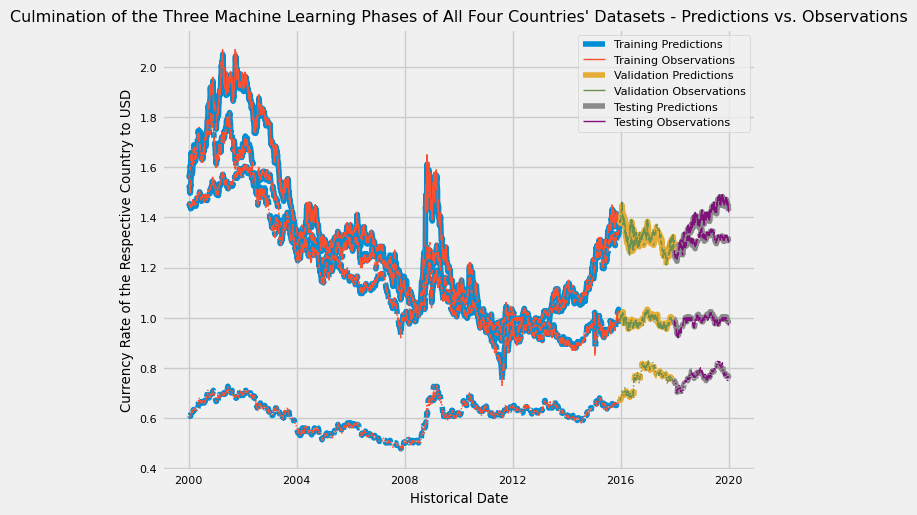

In [38]:
# Plotting all countries' observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model)
# in an overall sense 
plt.plot(dates_austrailia_train, austrailia_train_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_train, y_austrailia_train, linewidth=1, linestyle="solid")
plt.plot(dates_austrailia_val, austrailia_val_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_val, y_austrailia_val, linewidth=1, linestyle="solid")
plt.plot(dates_austrailia_test, austrailia_test_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_test, y_austrailia_test, linewidth=1, linestyle="solid")

plt.plot(dates_canada_train, canada_train_pred, linewidth=4, linestyle="dashed")
plt.plot(dates_canada_train, y_canada_train, linewidth=1, linestyle="dashed")
plt.plot(dates_canada_val, canada_val_pred, linewidth=4, linestyle="dashed")
plt.plot(dates_canada_val, y_canada_val, linewidth=1, linestyle="dashed")
plt.plot(dates_canada_test, canada_test_pred, linewidth=4, linestyle="dashed")
plt.plot(dates_canada_test, y_canada_test, linewidth=1, linestyle="dashed")

plt.plot(dates_united_kingdom_train, united_kingdom_train_pred, linewidth=4, linestyle="dotted")
plt.plot(dates_united_kingdom_train, y_united_kingdom_train, linewidth=1, linestyle="dotted")
plt.plot(dates_united_kingdom_val, united_kingdom_val_pred, linewidth=4, linestyle="dotted")
plt.plot(dates_united_kingdom_val, y_united_kingdom_val, linewidth=1, linestyle="dotted")
plt.plot(dates_united_kingdom_test, united_kingdom_test_pred, linewidth=4, linestyle="dotted")
plt.plot(dates_united_kingdom_test, y_united_kingdom_test, linewidth=1, linestyle="dotted")

plt.plot(dates_switzerland_train, switzerland_train_pred, linewidth=4, linestyle="dashdot")
plt.plot(dates_switzerland_train, y_switzerland_train, linewidth=1, linestyle="dashdot")
plt.plot(dates_switzerland_val, switzerland_val_pred, linewidth=4, linestyle="dashdot")
plt.plot(dates_switzerland_val, y_switzerland_val, linewidth=1, linestyle="dashdot")
plt.plot(dates_switzerland_test, switzerland_test_pred, linewidth=4, linestyle="dashdot")
plt.plot(dates_switzerland_test, y_switzerland_test, linewidth=1, linestyle="dashdot")

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations"])
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of All Four Countries' Datasets - Predictions vs. Observations")
plt.show()

Ultimately, here is the moment of truth: I tried to predict Austrailia's expected projection on its international currency rate between the United States through using my LSTM prediction model as shown below. However, unfortunately, it did not predict as well as I hoped, but this was a good experiment, nonetheless.

In [39]:
# Attempt at using the model to predict into the future for Austrailia's currency rate
recursive_pred: list = []
recursive_dates = np.concatenate([dates_austrailia_val, dates_austrailia_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_austrailia_train[-1])
    next_pred = austrailia_model.predict(np.array([last_window])).flatten()
    recursive_pred.append(next_pred)
    last_window[-1] = next_pred

1/1 [==============================] - 0s 16ms/step


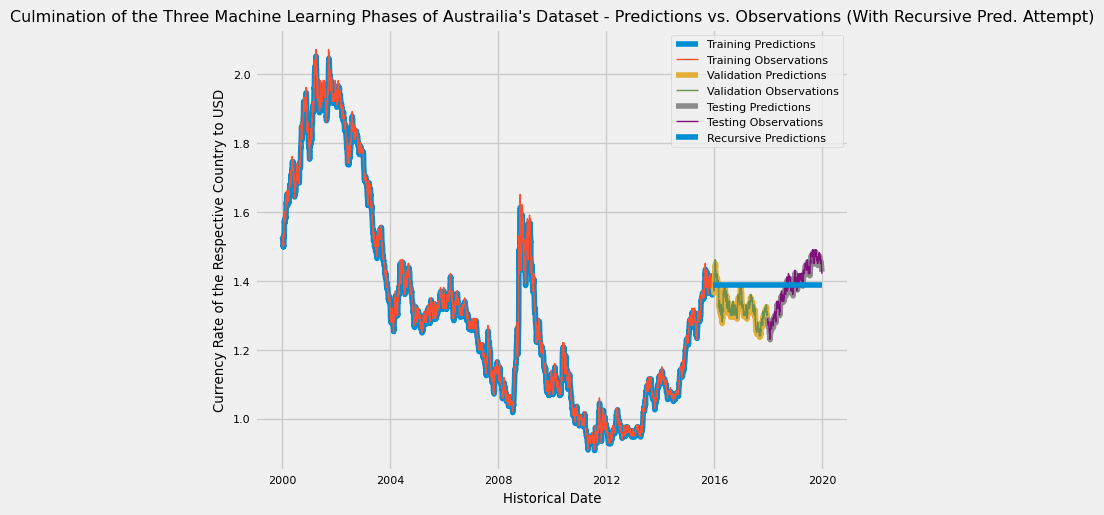

In [40]:
# Plotting all countries' observational (reference) data with the predictions 
# of its Machine Learning Model (as a way to visually inspect the effectiveness of the model)
# in an overall sense 
plt.plot(dates_austrailia_train, austrailia_train_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_train, y_austrailia_train, linewidth=1, linestyle="solid")
plt.plot(dates_austrailia_val, austrailia_val_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_val, y_austrailia_val, linewidth=1, linestyle="solid")
plt.plot(dates_austrailia_test, austrailia_test_pred, linewidth=4, linestyle="solid")
plt.plot(dates_austrailia_test, y_austrailia_test, linewidth=1, linestyle="solid")
plt.plot(recursive_dates, recursive_pred, linewidth=4, linestyle="solid")

plt.legend(["Training Predictions",
            "Training Observations",
            "Validation Predictions",
            "Validation Observations",
            "Testing Predictions",
            "Testing Observations",
            "Recursive Predictions"], loc="upper right")
plt.rcParams["font.size"] = 8
plt.tight_layout()
plt.xlabel("Historical Date")
plt.ylabel("Currency Rate of the Respective Country to USD")
plt.title("Culmination of the Three Machine Learning Phases of Austrailia's Dataset - Predictions vs. Observations (With Recursive Pred. Attempt)")
plt.show()

## Conclusions

- (1)
- (2)
- (3)

## Reference Sources and Citations (IEEE Format)

To complete this blog post, I used the following online sources as references for developing this:

[1] US International Exchange Rates Dataset:

B. Ferreira, "Foreign Exchange Rates 2000-2019", 2019. [Online]. Available: https://www.kaggle.com/datasets/brunotly/foreign-exchange-rates-per-dollar-20002019. [Accessed: 04-Sep.-2023].

[2] Tutorial on Basics of LSTM and Prediction & Forecasting in Machine Learning:

Greg Hogg, "Stock Price Prediction & Forecasting with LSTM Neural Networks in Python", *YouTube*, 26-Mar.-2022. [Online.] Available: https://www.youtube.com/watch?v=CbTU92pbDKw. [Accessed: 06-Sep.-2023]. 